### Topic:        Project 1
### Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
### Date:         09/06/2021
### Name:         RAGHAD RASHED
Exploratory Data Analysis (EDA) for the publicly available MTA dataset.To provide insight into the fictional entity (RSTABUS) and meet its needs.
First, prepare the libraries that may needed to handle the MTA dataset.

In [3]:
#import libraries
import pandas as pd
from sqlalchemy import create_engine
from sqlite3 import connect
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests
import smtplib
import datetime
import glob

In [3]:
conda install -c https://conda.anaconda.org/plotly plotly

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Call the MTA database and specify the period to be analyzed

In [6]:
# Reading Multiple txt Files and Creating Data Frame
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
# create empty list and append all files
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = ["210925","210918","210911","210904",
             "210828","210821","210814","210807",
             "210731","210724","210717","210710",
            "210703"]
# Concatenate all data into one DataFrame that called "rstabus_df"
rstabus_df = get_data(week_nums)
rstabus_df.to_csv('data.csv',index=False)

In [9]:
#(print working directory) writes the full pathname of the current working directory to the standard output.
pwd

In [10]:
#Checking DataFrame's first 5 rows
rstabus_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561


In [11]:
#Checking DataFrame's last 5 rows
rstabus_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585
209829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,21:00:00,REGULAR,5554,585


In [12]:
engine = create_engine("sqlite:///rstabus.db")
rstabus_df = pd.read_sql('SELECT * FROM data;',engine)

# Check full summary 
A quick trip to decode the information from provided on datasets.

In [13]:
#Checking general info about dataframe
rstabus_df.info

<bound method DataFrame.info of            C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  09/18/2021   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  09/18/2021   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  09/18/2021   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  09/18/2021   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  09/18/2021   
...        ...   ...       ...            ...      ...      ...         ...   
5448831  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  07/02/2021   
5448832  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  07/02/2021   
5448833  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  07/02/2021   
5448834  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  07/02/2021   
5448835  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  07/02/2021   

             TIME  

In [14]:
#Checking basic descriptive statistics for numerical columns.
rstabus_df.describe()

,ENTRIES,EXITS
count,5.448836e+06,5.448836e+06
mean,4.148078e+07,3.317211e+07
std,2.181339e+08,1.916161e+08
min,0.000000e+00,0.000000e+00
25%,2.198380e+05,1.027980e+05
50%,1.396824e+06,8.526620e+05
75%,5.997713e+06,3.971601e+06
max,2.147407e+09,2.133797e+09


In [15]:
#Checking DataFrame size
rstabus_df.shape

(5448836, 11)

In [16]:
#Checking null values based on columns
rstabus_df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [17]:
rstabus_df.head(8)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,20:00:00,REGULAR,7637377,2613583
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,00:00:00,REGULAR,7637440,2613598
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/19/2021,04:00:00,REGULAR,7637449,2613602


In [18]:
rstabus_df.tail(8)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
5448828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,17:00:00,REGULAR,5554,585
5448829,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2021,21:00:00,REGULAR,5554,585
5448830,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,01:00:00,REGULAR,5554,585
5448831,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
5448832,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
5448833,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
5448834,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585
5448835,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,21:00:00,REGULAR,5554,585


In [19]:
#counter for each stations
rstabus_df.STATION.value_counts()

34 ST-PENN STA     110780
FULTON ST          104702
GRD CNTRL-42 ST     99418
23 ST               79718
86 ST               70842
                    ...  
SHEPHERD AV          3250
KOSCIUSZKO ST        3246
PRESIDENT ST         3244
SUTTER AV            2184
CLEVELAND ST         2180
Name: STATION, Length: 379, dtype: int64

In [20]:
# Checking columns names
rstabus_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [21]:
# Creating DATETIME as datetime column that concatenate "DATE" and "TIME"

rstabus_df['DATETIME'] = rstabus_df["DATE"]+ " " + rstabus_df["TIME"]

rstabus_df['DATETIME'] = pd.to_datetime(rstabus_df['DATETIME'], format='%m/%d/%Y %H:%M:%S')

rstabus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5448836 entries, 0 to 5448835
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 498.9+ MB


In [22]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(rstabus_df["DATETIME"].max())
print()
print("Minimum date: ")
print(rstabus_df["DATETIME"].min())

Maximum date: 
2021-09-24 23:57:20

Minimum date: 
2021-06-26 00:00:00


In [23]:
rstabus_df.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18


In [24]:
#Create a column that called "NAMEOFDAY"
rstabus_df["NAMEOFDAY"]= rstabus_df["DATETIME"].dt.day_name()

#Checking sample 5 rows
rstabus_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAMEOFDAY
737172,N541,R241,01-06-02,15 ST-PROSPECT,FG,IND,08/29/2021,12:30:00,REGULAR,1483639,1924529,2021-08-29 12:30:00,Sunday
4354813,R240,R047,00-03-08,GRD CNTRL-42 ST,4567S,IRT,08/01/2021,09:00:00,REGULAR,39686795,8596551,2021-08-01 09:00:00,Sunday
805832,R315,R406,01-00-00,PROSPECT AV,25,IRT,09/01/2021,09:00:00,REGULAR,1217457,2001938,2021-09-01 09:00:00,Wednesday
649847,C001,R108,01-00-02,BOROUGH HALL,R2345,BMT,08/29/2021,16:00:00,REGULAR,179520,149423,2021-08-29 16:00:00,Sunday
4636674,D002,R390,00-03-03,8 AV,N,BMT,07/18/2021,21:00:00,REGULAR,3595324,2219270,2021-07-18 21:00:00,Sunday


In [25]:
# Determine the periods of the day based on DATATIME column 
rstabus_df["TIME_INTERVAL"] = (
         np.where(
             (rstabus_df.DATETIME.dt.hour <= 8), "Morning period"
                 ,np.where(
                     (rstabus_df.DATETIME.dt.hour <= 16), "After Noon period"
                         ,"Evening ")))


In [26]:
rstabus_df 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455,2021-09-18 00:00:00,Saturday,Morning period
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457,2021-09-18 04:00:00,Saturday,Morning period
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478,2021-09-18 08:00:00,Saturday,Morning period
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524,2021-09-18 12:00:00,Saturday,After Noon period
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561,2021-09-18 16:00:00,Saturday,After Noon period
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448831,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585,2021-07-02 05:00:00,Friday,Morning period
5448832,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585,2021-07-02 09:00:00,Friday,After Noon period
5448833,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585,2021-07-02 13:00:00,Friday,After Noon period
5448834,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585,2021-07-02 17:00:00,Friday,Evening


In [27]:
rstabus_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'NAMEOFDAY', 'TIME_INTERVAL'],
      dtype='object')

In [28]:
#str.strip()  function is used to remove or strip the leading and trailing space of the column in pandas dataframe. 
#Str.replace() function is used to strip all the spaces of the column in pandas
rstabus_df.columns = [column.strip() for column in rstabus_df.columns]
rstabus_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'NAMEOFDAY', 'TIME_INTERVAL'],
      dtype='object')

In [29]:
# Working with only neccessary columns

rstabus_df =rstabus_df[["C/A", "UNIT", "SCP","STATION","DATETIME","ENTRIES","EXITS","NAMEOFDAY","TIME_INTERVAL"]]
rstabus_df.head(10)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,2021-09-18 00:00:00,7637026,2613455,Saturday,Morning period
1,A002,R051,02-00-00,59 ST,2021-09-18 04:00:00,7637036,2613457,Saturday,Morning period
2,A002,R051,02-00-00,59 ST,2021-09-18 08:00:00,7637047,2613478,Saturday,Morning period
3,A002,R051,02-00-00,59 ST,2021-09-18 12:00:00,7637104,2613524,Saturday,After Noon period
4,A002,R051,02-00-00,59 ST,2021-09-18 16:00:00,7637236,2613561,Saturday,After Noon period
5,A002,R051,02-00-00,59 ST,2021-09-18 20:00:00,7637377,2613583,Saturday,Evening
6,A002,R051,02-00-00,59 ST,2021-09-19 00:00:00,7637440,2613598,Sunday,Morning period
7,A002,R051,02-00-00,59 ST,2021-09-19 04:00:00,7637449,2613602,Sunday,Morning period
8,A002,R051,02-00-00,59 ST,2021-09-19 08:00:00,7637454,2613612,Sunday,Morning period
9,A002,R051,02-00-00,59 ST,2021-09-19 12:00:00,7637494,2613646,Sunday,After Noon period


In [30]:
rstabus_df


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,2021-09-18 00:00:00,7637026,2613455,Saturday,Morning period
1,A002,R051,02-00-00,59 ST,2021-09-18 04:00:00,7637036,2613457,Saturday,Morning period
2,A002,R051,02-00-00,59 ST,2021-09-18 08:00:00,7637047,2613478,Saturday,Morning period
3,A002,R051,02-00-00,59 ST,2021-09-18 12:00:00,7637104,2613524,Saturday,After Noon period
4,A002,R051,02-00-00,59 ST,2021-09-18 16:00:00,7637236,2613561,Saturday,After Noon period
...,...,...,...,...,...,...,...,...,...
5448831,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 05:00:00,5554,585,Friday,Morning period
5448832,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 09:00:00,5554,585,Friday,After Noon period
5448833,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 13:00:00,5554,585,Friday,After Noon period
5448834,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-07-02 17:00:00,5554,585,Friday,Evening


In [31]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(rstabus_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
2702968,S101,R070,00-00-02,ST. GEORGE,2021-09-16 08:00:00,4
2702884,S101,R070,00-00-02,ST. GEORGE,2021-09-02 16:00:00,4
2455849,R516,R291,00-00-00,33 ST-RAWSON ST,2021-08-24 16:00:00,4
1390007,N535,R220,00-00-01,CARROLL ST,2021-08-31 16:00:00,4
1389458,N535,R220,00-00-00,CARROLL ST,2021-08-31 16:00:00,4


In [32]:
#Checking duplicates rows and drop.
# Get rid of the duplicate entry
rstabus_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
                          inplace=True, ascending=False)
rstabus_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)
rstabus_df

<ipython-input-32-539f732e77f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rstabus_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],
<ipython-input-32-539f732e77f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rstabus_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)


,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,EXITS,NAMEOFDAY,TIME_INTERVAL
210399,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,5554,646,Friday,Evening
210398,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,646,Friday,Evening
210397,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,645,Friday,After Noon period
210396,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,645,Friday,After Noon period
210395,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,645,Friday,Morning period
...,...,...,...,...,...,...,...,...,...
2514592,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2595791,Saturday,After Noon period
2514591,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2595762,Saturday,After Noon period
2514590,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2595729,Saturday,Morning period
2514589,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2595713,Saturday,Morning period


In [33]:

(rstabus_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
1816191,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 12:00:00,1
1816193,R139,R031,04-00-00,34 ST-PENN STA,2021-09-05 20:00:00,1
1816194,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 00:00:00,1
1816195,R139,R031,04-00-00,34 ST-PENN STA,2021-09-06 04:00:00,1


# Cumulative ,Rest,and  Revers Issue -Outliers


In [34]:
rstabus_daily = (rstabus_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],as_index=False)
                        .ENTRIES.first())

In [35]:
rstabus_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992


In [36]:
rstabus_daily[["PREV_DATETIME", "PREV_ENTRIES"]] = (rstabus_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-36-18f3d31cd9b6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rstabus_daily[["PREV_DATETIME", "PREV_ENTRIES"]] = (rstabus_daily


In [37]:
rstabus_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,7592792,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0


In [38]:
# Drop the rows for the earliest date in the df
rstabus_daily.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

In [39]:
rstabus_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2021-06-26 16:00:00,7592992.0


In [40]:
# Let's see how many stations have this problem

(rstabus_daily[rstabus_daily["ENTRIES"] < rstabus_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         544
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A049  R088  02-05-00  CORTLANDT ST        24
A066  R118  00-00-00  CANAL ST           544
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        553
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R730  R431  00-00-04  EASTCHSTER/DYRE    484
S101  R070  00-00-02  ST. GEORGE           6
Length: 225, dtype: int64

In [41]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
rstabus_daily["DAILY_ENTRIES"] = rstabus_daily.apply(get_daily_counts, axis=1, max_counter=100000)

393216 1.0
5 150038.0
193 8049630.0
10 468616.0
167790067 702272.0
151 5610355.0
149 132517.0
35 9769328.0
33565227 188201.0
31 8724126.0
458766 2578.0
6 106396.0
164 150473.0
393216 728.0
66 3272795.0
64 124319.0
67 1605140.0
5671 4298891.0
0 117440512.0
83 367525.0
15848006 2216515.0
2216520 15848006.0
10487784 2024.0
2024 10487784.0
10 500619.0
327680 7577112.0
26 490316.0
67109632 14.0
327682 67109640.0
15 67109632.0
14 1198448.0
37 305512.0
46 5405537.0
23 705357551.0
16777220 1037161.0
6 16034831.0
183 197843.0
458788 271020.0
327680 786526.0
327680 0.0
34 6214051.0
28 656520.0
37 1950780.0
173 15689534.0
7 558275.0
290 239100.0
176 114113.0
2718 174019.0
174023 2718.0
609994 1021.0
1195 609994.0
26911 332760.0
332770 26911.0
0 117404.0
0 182617.0
430827 73.0
5 430827.0
131640 408512.0
408706 131640.0
7 101752.0
101812 7.0
265384 54590.0
54602 265384.0
89 624773.0
6857 430115.0
430827 9370.0
9429 430827.0
75 226654.0
108 277883.0
4 118847.0
1 146227.0
70 319276.0
8 1255797.0
21 1

In [42]:
rstabus_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2021-06-26 16:00:00,7592992.0,124.0


In [43]:
rstabus2_daily = (rstabus_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],as_index=False)
                        .EXITS.first())

In [44]:
rstabus2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,2595706
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791


In [45]:
rstabus2_daily[["PREV_DATETIME", "PREV_EXITS"]] = (rstabus2_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-45-656e3da4f5a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rstabus2_daily[["PREV_DATETIME", "PREV_EXITS"]] = (rstabus2_daily


In [46]:
rstabus2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,2595706,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0


In [47]:
# Drop the rows for the earliest date in the df
rstabus2_daily.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

In [48]:
rstabus2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,2595809,2021-06-26 16:00:00,2595791.0


In [49]:
# Let's see how many stations have this problem

(rstabus2_daily[rstabus2_daily["EXITS"] < rstabus2_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A011  R080  01-03-00  57 ST-7 AV         544
A013  R081  01-06-01  49 ST                1
A014  R081  02-00-00  49 ST                1
A082  R028  05-05-01  FULTON ST            1
A084  R125  01-03-02  BROAD ST             1
                                        ... 
R622  R123  00-00-00  FRANKLIN AV        549
R633  R068  00-00-01  VAN SICLEN AV        1
R646  R110  01-00-02  FLATBUSH AV-B.C      1
R728  R226  00-05-01  GUN HILL RD          1
S101  R070  00-00-02  ST. GEORGE           6
Length: 211, dtype: int64

In [50]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter
rstabus2_daily["DAILY_EXITS"] = rstabus2_daily.apply(get_daily_counts, axis=1, max_counter=100000)

63 2357391.0
124 689992.0
268473354 1083236.0
187 2246287.0
1 1076720.0
100678103 413088.0
36 8512839.0
7 1025567.0
50 205674.0
12 274285.0
146 2544401.0
23 161084.0
164 152516.0
42 561847.0
3844 494213.0
306 1152627.0
14484466 852978.0
852978 14484466.0
15894763 166123.0
166125 15894763.0
2133796536 55614.0
55627 2133796536.0
2 477315.0
0 2004698.0
13 319261.0
7 1502424.0
50 1852012.0
4 705468481.0
1057292926 347736.0
347800 1057292926.0
13 416028.0
25 7304094.0
110 255803.0
36 767349.0
33 2136659.0
1179 3095180.0
208 8944327.0
327680 22595.0
115331 5260.0
5260 115331.0
72 836225.0
80 370296.0
25881 146879.0
146892 25881.0
0 205881.0
287540 4132.0
4835 287540.0
287893 3421.0
3631 287893.0
201772 2169.0
161 201772.0
183 839250.0
839395 183.0
23722 143915.0
143929 23722.0
500607 0.0
0 500607.0
186 116059.0
60 448959.0
0 427375.0
55 172646.0
18 167956.0
0 1240819.0
261396 31902.0
31902 261396.0
365000 31961.0
31961 365000.0
20 202479.0
245 234976.0
36 238675.0
12 191692.0
14 346560.0
1 1

In [51]:
rstabus2_daily.head()

,C/A,UNIT,SCP,STATION,DATETIME,EXITS,PREV_DATETIME,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,2595713,2021-06-26 00:00:00,2595706.0,7.0
2,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,2595729,2021-06-26 04:00:00,2595713.0,16.0
3,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,2595762,2021-06-26 08:00:00,2595729.0,33.0
4,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,2595791,2021-06-26 12:00:00,2595762.0,29.0
5,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,2595809,2021-06-26 16:00:00,2595791.0,18.0


In [52]:
dailytraffic_df=rstabus_daily.merge(rstabus2_daily,how='inner',on=["C/A", "UNIT", "SCP", "STATION","DATETIME"])

In [53]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATETIME_x,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_DATETIME_y,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,7592804,2021-06-26 00:00:00,7592792.0,12.0,2595713,2021-06-26 00:00:00,2595706.0,7.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,7592816,2021-06-26 04:00:00,7592804.0,12.0,2595729,2021-06-26 04:00:00,2595713.0,16.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,7592870,2021-06-26 08:00:00,7592816.0,54.0,2595762,2021-06-26 08:00:00,2595729.0,33.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,7592992,2021-06-26 12:00:00,7592870.0,122.0,2595791,2021-06-26 12:00:00,2595762.0,29.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,7593116,2021-06-26 16:00:00,7592992.0,124.0,2595809,2021-06-26 16:00:00,2595791.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,5554,2021-09-24 01:00:00,5554.0,0.0,645,2021-09-24 01:00:00,645.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,5554,2021-09-24 05:00:00,5554.0,0.0,645,2021-09-24 05:00:00,645.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,5554,2021-09-24 09:00:00,5554.0,0.0,645,2021-09-24 09:00:00,645.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,5554,2021-09-24 13:00:00,5554.0,0.0,646,2021-09-24 13:00:00,645.0,1.0


In [54]:
#drop multiple columns by name
dailytraffic_df.drop(['ENTRIES','PREV_DATETIME_x','PREV_ENTRIES','EXITS','PREV_DATETIME_y','PREV_EXITS'], axis=1, inplace=True)

In [55]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,12.0,7.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,12.0,16.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,54.0,33.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,122.0,29.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,124.0,18.0
...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0


In [56]:
dailytraffic_df['DAILY_TRAFFIC'] =(dailytraffic_df ['DAILY_ENTRIES'] +dailytraffic_df['DAILY_EXITS'])

In [57]:
dailytraffic_df

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,12.0,7.0,19.0
1,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,12.0,16.0,28.0
2,A002,R051,02-00-00,59 ST,2021-06-26 12:00:00,54.0,33.0,87.0
3,A002,R051,02-00-00,59 ST,2021-06-26 16:00:00,122.0,29.0,151.0
4,A002,R051,02-00-00,59 ST,2021-06-26 20:00:00,124.0,18.0,142.0
...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0,0.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0,0.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0,0.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0


In [58]:
dailytraffic_df.tail(2000)

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
2717268,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2021-07-29 17:00:00,35.0,2.0,37.0
2717269,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2021-07-29 21:00:00,13.0,1.0,14.0
2717270,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2021-07-30 01:00:00,13.0,2.0,15.0
2717271,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2021-07-30 05:00:00,0.0,0.0,0.0
2717272,TRAM2,R469,00-03-00,RIT-ROOSEVELT,2021-07-30 09:00:00,9.0,2.0,11.0
...,...,...,...,...,...,...,...,...
2719263,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 05:00:00,0.0,0.0,0.0
2719264,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 09:00:00,0.0,0.0,0.0
2719265,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 13:00:00,0.0,0.0,0.0
2719266,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0


In [59]:
#grouping the same data above by stations to find of a sum of daily entires and exists for top 5 stations
top10_stations = (dailytraffic_df.groupby(['STATION'])['DAILY_TRAFFIC'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_TRAFFIC',ascending=False) 
                   
                   .STATION.head(10))
top10_stations

61      34 ST-PENN STA
59     34 ST-HERALD SQ
233    GRD CNTRL-42 ST
110              86 ST
14      14 ST-UNION SQ
68     42 ST-PORT AUTH
46               23 ST
9               125 ST
353     TIMES SQ-42 ST
226          FULTON ST
Name: STATION, dtype: object

In [60]:
all_stations = dailytraffic_df.groupby('STATION').sum()\
    .sort_values('DAILY_TRAFFIC', ascending=False)\
    .reset_index()
all_stations

,STATION,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,34 ST-PENN STA,4133160.0,5513552.0,9646712.0
1,34 ST-HERALD SQ,3102136.0,4193260.0,7295396.0
2,GRD CNTRL-42 ST,2896874.0,4237240.0,7134114.0
3,86 ST,2634159.0,3671475.0,6305634.0
4,14 ST-UNION SQ,2550320.0,3742380.0,6292700.0
...,...,...,...,...
374,BEACH 98 ST,20652.0,31592.0,52244.0
375,BEACH 105 ST,13331.0,22136.0,35467.0
376,TOMPKINSVILLE,27156.0,3.0,27159.0
377,BROAD CHANNEL,10493.0,6252.0,16745.0


#### Creat Bar Chart of the Top 10 stations

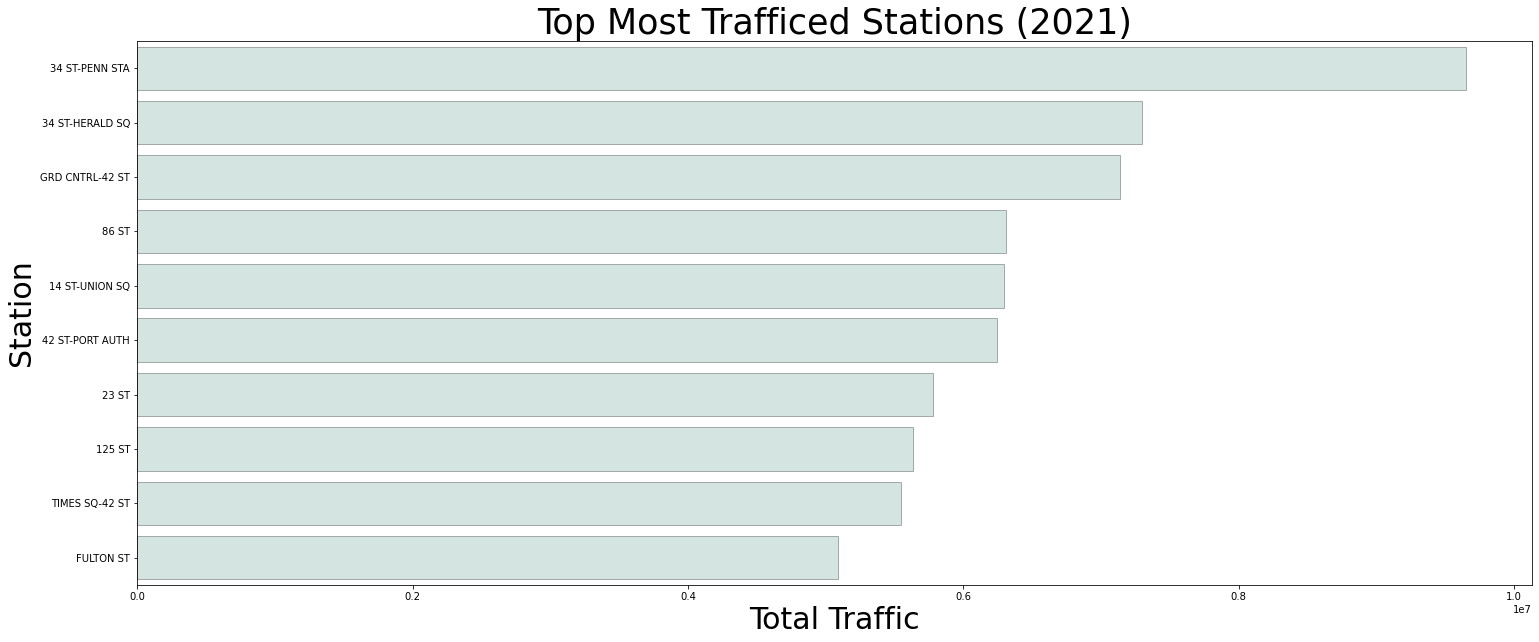

In [61]:
stations_totals = dailytraffic_df.groupby('STATION', as_index=False).DAILY_TRAFFIC.sum()
stations_totals.rename(columns={'turn_traffic':'total_st_traffic'}, inplace=True)
stations_totals.sort_values(by='DAILY_TRAFFIC', ascending=False, inplace=True)

plt.figure(figsize=[25,10])
sns.barplot(x='DAILY_TRAFFIC', y='STATION', data=stations_totals[:10],edgecolor='black', color='#69b3a2',alpha=0.3)
plt.title('Top Most Trafficed Stations (2021)', fontsize=35,color='black')
plt.xlabel('Total Traffic', fontsize=30)
plt.ylabel('Station', fontsize=30);

In [65]:
group_station = dailytraffic_df.groupby('STATION')['DAILY_TRAFFIC'].sum().sort_values(ascending=False)

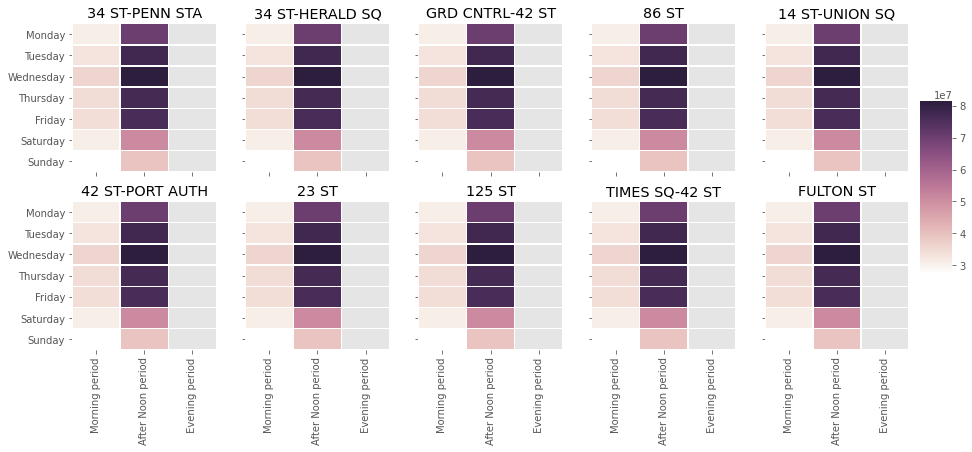

In [97]:
matrix_list= []
for station in list(group_station.head(10).index):
    df_station = dailytraffic_df[dailytraffic_df['STATION']==station]
    group_day_time = linestation_df.groupby(['NAMEOFDAY','TIME_INTERVAL'])['DAILY_TRAFFIC'].sum()
    matrix_day_time = group_day_time.unstack()
    matrix_day_time.reset_index()
    matrix_day_time = matrix_day_time.reindex(index=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["Morning period","After Noon period"," Evening period"])
    matrix_list.append(matrix_day_time)

fig, axn = plt.subplots(2,5, sharex=True, sharey=True, figsize=(15,6))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax=ax, cmap=cmap,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                linecolor='white',linewidths=0.5)
    ax.set_title(list(group_station.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')


In [107]:
#Daily Usage for Top 10 Stations
mta_top10_daily = linestation_df.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top10_daily = linestation_df.reset_index()

mta_top10_daily = mta_top10_daily[(mta_top10_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_top10_daily["STATION"]=="34 ST-HERALD SQ")
                  | (mta_top10_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (mta_top10_daily["STATION"]=='86 ST')
                  | (mta_top10_daily["STATION"]=="14 ST-UNION SQ")
                  | (mta_top10_daily["STATION"]=="14 ST-PORT AUTH")
                  | (mta_top10_daily["STATION"]=="23 ST")
                  | (mta_top10_daily["STATION"]=="125 ST")
                  | (mta_top10_daily["STATION"]=="TIMES SQ-42 ST")
                  | (mta_top10_daily["STATION"]=="FULTON ST")]


mta_top10_daily = mta_top10_daily.reset_index()

mta_top10_daily.head(5)

,level_0,index,C/A,UNIT,SCP,STATION,LINENAME,DAILY_TRAFFIC,NAMEOFDAY,TIME_INTERVAL,DATETIME
0,116109,116109,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,68.0,Saturday,Morning period,2021-06-26 04:00:00
1,116110,116110,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,68.0,Saturday,Morning period,2021-06-26 04:00:00
2,116111,116111,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,68.0,Saturday,Morning period,2021-06-26 04:00:00
3,116112,116112,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,95.0,Saturday,Morning period,2021-06-26 08:00:00
4,116113,116113,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,95.0,Saturday,Morning period,2021-06-26 08:00:00


In [108]:
#Reindex for top10 daily data frame

mta_top10_daily_order = mta_top10_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,
                                                         14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,
                                                         30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])

mta_top10_daily_order.head(5)

,level_0,index,C/A,UNIT,SCP,STATION,LINENAME,DAILY_TRAFFIC,NAMEOFDAY,TIME_INTERVAL,DATETIME
1,116110,116110,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,68.0,Saturday,Morning period,2021-06-26 04:00:00
5,116114,116114,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,95.0,Saturday,Morning period,2021-06-26 08:00:00
6,116115,116115,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,397.0,Saturday,After Noon period,2021-06-26 12:00:00
4,116113,116113,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,95.0,Saturday,Morning period,2021-06-26 08:00:00
0,116109,116109,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,68.0,Saturday,Morning period,2021-06-26 04:00:00


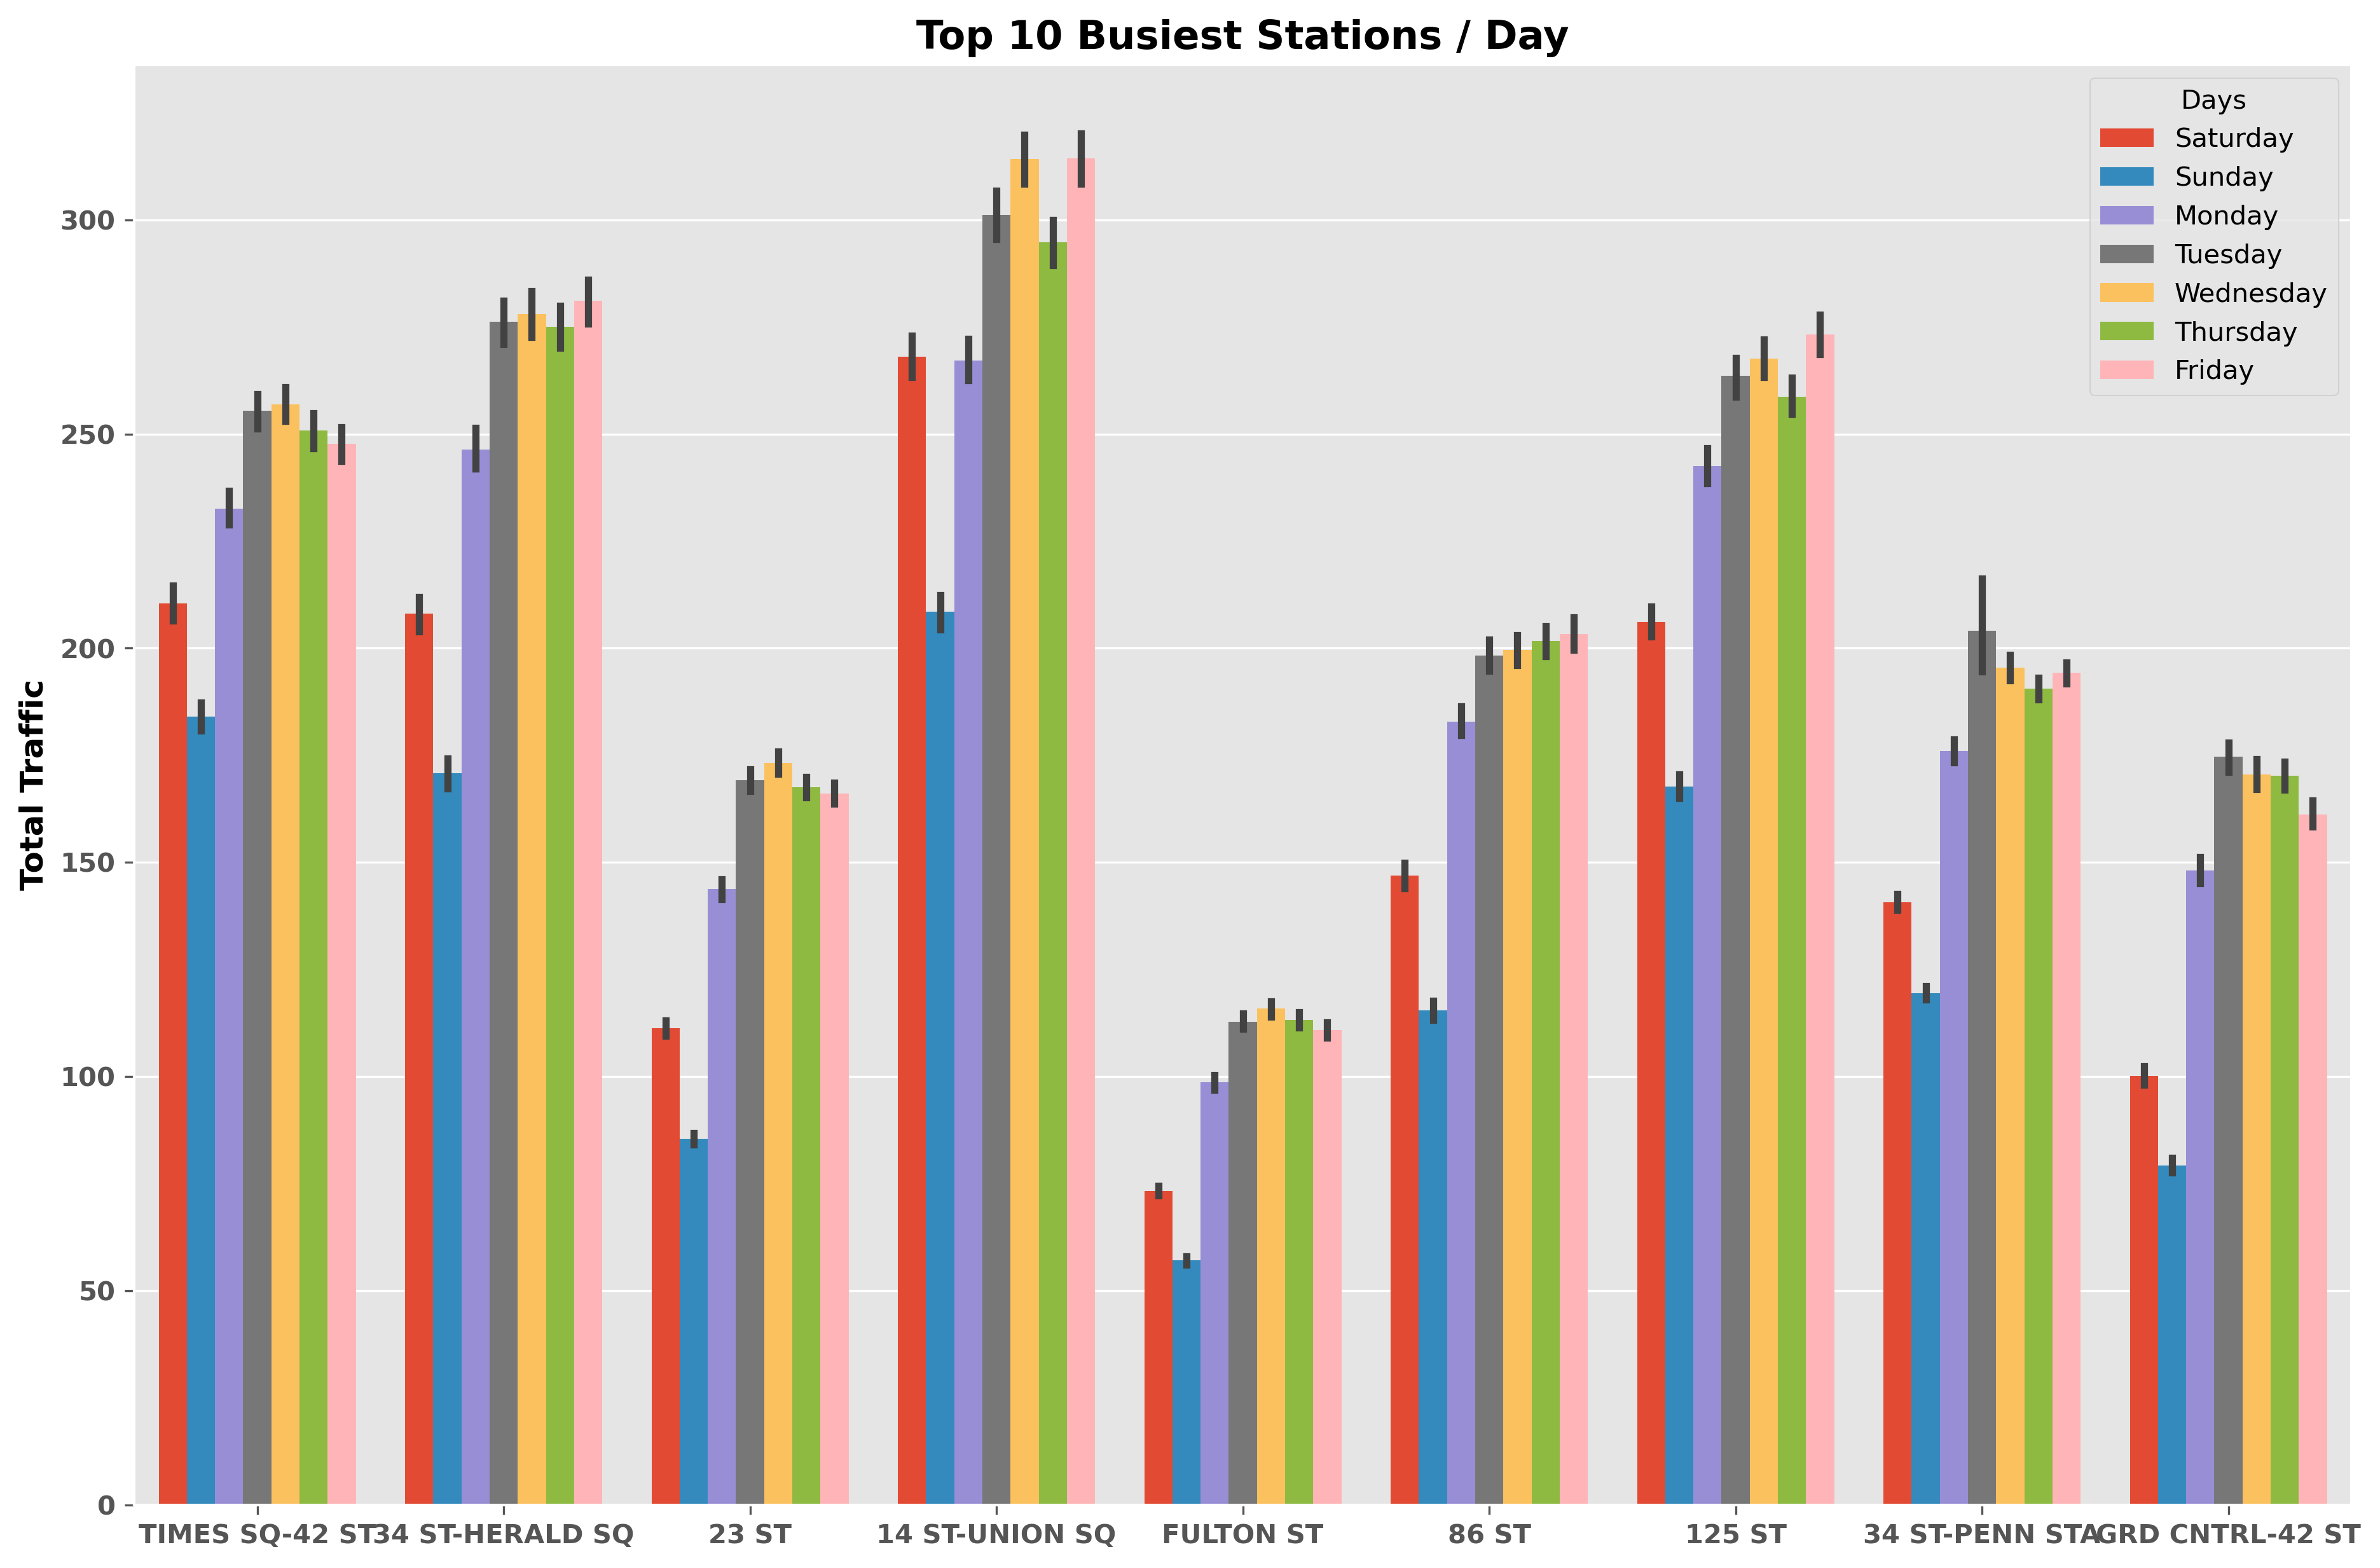

In [109]:
#Barplot for Top 10 Busiest Stations per Day

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('ggplot')
ax = sns.barplot(x="STATION", y="DAILY_TRAFFIC", hue="NAMEOFDAY",data=mta_top10_daily, saturation=1)
plt.title("Top 10 Busiest Stations / Day", weight="bold", c="black", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()

#### create a new of same Datasets, Clean and Merge to find line name for each stations

In [69]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = ["210925","210918","210911","210904",
             "210828","210821","210814","210807",
             "210731","210724","210717","210710",
            "210703"]

rstabus_df2 = get_data(week_nums)
rstabus_df2.to_csv('data.csv',index=False)

In [72]:
engine = create_engine("sqlite:///rstabus.db")
rstabus_df2 = pd.read_sql('SELECT * FROM data;',engine)

In [73]:
rstabus_df2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,00:00:00,REGULAR,7637026,2613455
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,04:00:00,REGULAR,7637036,2613457
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,08:00:00,REGULAR,7637047,2613478
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,12:00:00,REGULAR,7637104,2613524
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/18/2021,16:00:00,REGULAR,7637236,2613561
...,...,...,...,...,...,...,...,...,...,...,...
8173249,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
8173250,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
8173251,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
8173252,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585


joun with top stations and connect with LINENAME

In [74]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

rstabus_df2['DATETIME'] = rstabus_df2["DATE"]+ " " + rstabus_df2["TIME"]

rstabus_df2['DATETIME'] = pd.to_datetime(rstabus_df2['DATETIME'], format='%m/%d/%Y %H:%M:%S')

rstabus_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8173254 entries, 0 to 8173253
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 748.3+ MB


In [75]:
#Create a column that called "NAMEOFDAY"
rstabus_df2["NAMEOFDAY"]= rstabus_df2["DATETIME"].dt.day_name()

#Checking sample 5 rows
rstabus_df2.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAMEOFDAY
7965938,A015,R081,00-00-00,49 ST,NQRW,BMT,06/28/2021,00:00:00,REGULAR,13114481,4321073,2021-06-28 00:00:00,Monday
2770991,N011,R126,01-05-00,175 ST,A,IND,09/20/2021,20:00:00,REGULAR,393218,0,2021-09-20 20:00:00,Monday
4352479,R236,R045,00-03-01,GRD CNTRL-42 ST,4567S,IRT,08/03/2021,21:00:00,REGULAR,591943163,886072234,2021-08-03 21:00:00,Tuesday
142499,R155,R116,01-00-02,50 ST,1,IRT,09/21/2021,20:00:00,REGULAR,110596,57523,2021-09-21 20:00:00,Tuesday
3491386,R131,R190,00-00-00,23 ST,1,IRT,08/28/2021,01:00:00,REGULAR,3149612,1118911,2021-08-28 01:00:00,Saturday


In [76]:
rstabus_df2["TIME_INTERVAL"] = (
         np.where(
             (rstabus_df2.DATETIME.dt.hour <= 8), "Morning period"
                 ,np.where(
                     (rstabus_df2.DATETIME.dt.hour <= 16), "After Noon period"
                         ,"Evening")))


In [77]:
#str.strip()  function is used to remove or strip the leading and trailing space of the column in pandas dataframe. 
#Str.replace() function is used to strip all the spaces of the column in pandas
rstabus_df2.columns = [column.strip() for column in rstabus_df2.columns]
rstabus_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'NAMEOFDAY', 'TIME_INTERVAL'],
      dtype='object')

In [78]:
#drop multiple columns by name
rstabus_df2.drop(['DIVISION','DESC','ENTRIES',
                     'EXITS','DATE','TIME'], axis=1, inplace=True)


In [79]:
rstabus_df2.head(1)

,C/A,UNIT,SCP,STATION,LINENAME,DATETIME,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,NQR456W,2021-09-18,Saturday,Morning period


In [82]:
linestation_df=dailytraffic_df.merge(rstabus_df2,how='inner',on=["C/A","UNIT","SCP","STATION","DATETIME"])
linestation_df

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,LINENAME,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,12.0,7.0,19.0,NQR456W,Saturday,Morning period
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,12.0,7.0,19.0,NQR456W,Saturday,Morning period
2,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,12.0,7.0,19.0,NQR456W,Saturday,Morning period
3,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,12.0,16.0,28.0,NQR456W,Saturday,Morning period
4,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,12.0,16.0,28.0,NQR456W,Saturday,Morning period
...,...,...,...,...,...,...,...,...,...,...,...
8158165,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0,R,Friday,Evening
8158166,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,0.0,1.0,1.0,R,Friday,Evening
8158167,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,0.0,0.0,0.0,R,Friday,Evening
8158168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,0.0,0.0,0.0,R,Friday,Evening


In [83]:
#drop multiple columns by name
linestation_df.drop(['DAILY_ENTRIES','DAILY_EXITS'], axis=1, inplace=True)
linestation_df

,C/A,UNIT,SCP,STATION,DATETIME,DAILY_TRAFFIC,LINENAME,NAMEOFDAY,TIME_INTERVAL
0,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,19.0,NQR456W,Saturday,Morning period
1,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,19.0,NQR456W,Saturday,Morning period
2,A002,R051,02-00-00,59 ST,2021-06-26 04:00:00,19.0,NQR456W,Saturday,Morning period
3,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,28.0,NQR456W,Saturday,Morning period
4,A002,R051,02-00-00,59 ST,2021-06-26 08:00:00,28.0,NQR456W,Saturday,Morning period
...,...,...,...,...,...,...,...,...,...
8158165,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,1.0,R,Friday,Evening
8158166,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 17:00:00,1.0,R,Friday,Evening
8158167,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,0.0,R,Friday,Evening
8158168,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2021-09-24 21:00:00,0.0,R,Friday,Evening


In [84]:
# shift column 'LINENAME' to forth position
forth_column = linestation_df.pop('LINENAME')

# insert column using insert(position,column_name,forth_column) function
linestation_df.insert(4, 'LINENAME', forth_column)

# shift column 'DATETIME' to eighth position
eighth_column = linestation_df.pop('DATETIME')

# insert column using insert(position,column_name,eighth_column) function
linestation_df.insert(8, 'DATETIME', eighth_column)

In [85]:
linestation_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DAILY_TRAFFIC,NAMEOFDAY,TIME_INTERVAL,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,19.0,Saturday,Morning period,2021-06-26 04:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,19.0,Saturday,Morning period,2021-06-26 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,19.0,Saturday,Morning period,2021-06-26 04:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,28.0,Saturday,Morning period,2021-06-26 08:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,28.0,Saturday,Morning period,2021-06-26 08:00:00


In [87]:
#Checking Unique LINENAME count
len(linestation_df["LINENAME"].unique())

114

In [110]:
sort_station_line=linestation_df.groupby(['LINENAME','STATION'])['DAILY_TRAFFIC'].sum()
sort_station_lineation_line

LINENAME  STATION        
1         103 ST             2093766.0
          116 ST-COLUMBIA    1848132.0
          125 ST             1829316.0
          137 ST CITY COL    2654676.0
          145 ST             2532324.0
                               ...    
R1W       WHITEHALL S-FRY    2862762.0
R2345     BOROUGH HALL        444804.0
RNW       CORTLANDT ST       2862780.0
S         PARK PLACE          408585.0
S2345     BOTANIC GARDEN      433863.0
Name: DAILY_TRAFFIC, Length: 478, dtype: float64

In [5]:
#station_map=[Point(xy) for xy in zip (sample_df ["LONG"],sample_df["LAT"])]
#station_map[:3]
#fig=px.scatter_geo(sample_df,lat="LONG",hover_name="STATAION",size="sort_station_line")
#fig.update_layout("79 Street Station",title_x=0.5,geo_scope="usa")

#lat_fac=40.613608
#lon_foc=-74.000674
#fig.update_layout(
    #geo=dict(
        #projection_scale=10,#this is kind of like zoom 
        #center=dict (lat=lat_foc,lon=lon_foc)#this will center on the point
    #))